### Project Overview:
- Collect market data, use this data to predict intraday market volatility
- Often times, the market "pumps" or "dumps" in the afternoon trading hours (2-4PM).  This is what we would like to predict 
- Will predict this by constructing a Bayesian Classifier, which will classify the afternoon session as a "pump", "dump" or "flat" if no meaningful price change is expected
- There are a multitude of resources for financial data, so finding a lot of data on which to train the model shouldn't be difficult
- I've picked out a few of the data points I would like to use in my classifier, which are shown below.  However, my final submission should feature more data points

In [168]:
import pandas as pd
import numpy as np

### Importing multiple data points from locally downloaded CSV's to pandas dataframes.  

In [169]:
DIX = pd.read_csv("/Users/dzikipm1/Downloads/DIX.csv")
DIX = DIX.drop(columns=["price"])
DIX = DIX.rename(columns={"date": "Date"})
DIX.head()

,Date,dix,gex
0,2/3/20,0.408136,1.886169e+09
1,2/4/20,0.389276,3.359119e+09
2,2/5/20,0.410363,4.067938e+09
3,2/6/20,0.418595,5.336331e+09
4,2/7/20,0.430928,4.120952e+09


In [170]:
VIX = pd.read_csv("/Users/dzikipm1/Downloads/^VIX.csv")
VIX = VIX.drop(columns=['Open', 'High', "Low", "Close", "Volume"])
VIX = VIX.rename(columns={"Adj Close": "VIX"})
VIX.head()

,Date,VIX
0,2/3/20,17.969999
1,2/4/20,16.049999
2,2/5/20,15.150000
3,2/6/20,14.960000
4,2/7/20,15.470000


In [171]:
DXY = pd.read_csv("/Users/dzikipm1/Downloads/DX-Y.NYB.csv")
DXY = DXY.drop(columns=['Open', 'High', "Low", "Close", "Volume"])
DXY = DXY.rename(columns={"Adj Close": "DXY"})
DXY.head()

,Date,DXY
0,2/3/20,97.800003
1,2/4/20,97.959999
2,2/5/20,98.269997
3,2/6/20,98.500000
4,2/7/20,98.680000


In [172]:
joinedDf = pd.merge(DXY, VIX, how='inner', on="Date",
         left_index=False, right_index=False, sort=False,
         copy=True, indicator=False,
         validate=None)
joinedDf = pd.merge(joinedDf, DIX, how='inner', on="Date",
         left_index=False, right_index=False, sort=False,
         copy=True, indicator=False,
         validate=None)
joinedDf

,Date,DXY,VIX,dix,gex
0,2/3/20,97.800003,17.969999,0.408136,1.886169e+09
1,2/4/20,97.959999,16.049999,0.389276,3.359119e+09
2,2/5/20,98.269997,15.150000,0.410363,4.067938e+09
3,2/6/20,98.500000,14.960000,0.418595,5.336331e+09
4,2/7/20,98.680000,15.470000,0.430928,4.120952e+09
...,...,...,...,...,...
172,10/7/20,93.629997,28.059999,0.405003,5.088864e+09
173,10/8/20,93.610001,26.360001,0.406564,5.698565e+09
174,10/9/20,93.059998,25.000000,0.396785,8.490294e+09
175,10/12/20,93.070000,25.070000,0.366112,1.140267e+10


In [173]:
data = pd.read_csv("/Users/dzikipm1/Downloads/SPY.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2/3/20,323.350006,326.160004,323.220001,324.119995,319.534393,69242300
1,2/4/20,328.070007,330.010010,327.720001,329.059998,324.404449,62573200
2,2/5/20,332.269989,333.089996,330.670013,332.859985,328.150696,65951100
3,2/6/20,333.910004,334.190002,332.799988,333.980011,329.254883,50359700
4,2/7/20,332.820007,333.989990,331.600006,332.200012,327.500061,64139400


In [174]:
for index, row in data.iterrows():
    data["Difference"] =data['Close']-data['Open']

In [175]:
x = np.array(data["Difference"])
data['Classification'] = ''
for index, row in data.iterrows():
    a = x[index]
    if a >0:
        data["Classification"][index] = 1
    else:
        data["Classification"][index] = 0
data = data.drop(columns=['Open', 'High', "Low", "Close"])
data = data.rename(columns={"Adj Close": "SPY"})
data.head()

/Users/dzikipm1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/dzikipm1/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Date,SPY,Volume,Difference,Classification
0,2/3/20,319.534393,69242300,0.769989,1
1,2/4/20,324.404449,62573200,0.989991,1
2,2/5/20,328.150696,65951100,0.589996,1
3,2/6/20,329.254883,50359700,0.070007,1
4,2/7/20,327.500061,64139400,-0.619995,0


In [176]:
finalDf = pd.merge(joinedDf, data, how='inner', on="Date",
         left_index=False, right_index=False, sort=False,
 copy=True, indicator=False,
         validate=None)

In [182]:
#finalDf = finalDf.drop(columns=['Date'])
numeric = ['SPY', 'DXY', 'VIX', "dix", "gex", "Volume", "Difference", "Classification"]
finalDf[numeric] = finalDf[numeric].apply(pd.to_numeric, errors='coerce')
finalDf

,DXY,VIX,dix,gex,SPY,Volume,Difference,Classification
0,97.800003,17.969999,0.408136,1.886169e+09,319.534393,69242300,0.769989,1
1,97.959999,16.049999,0.389276,3.359119e+09,324.404449,62573200,0.989991,1
2,98.269997,15.150000,0.410363,4.067938e+09,328.150696,65951100,0.589996,1
3,98.500000,14.960000,0.418595,5.336331e+09,329.254883,50359700,0.070007,1
4,98.680000,15.470000,0.430928,4.120952e+09,327.500061,64139400,-0.619995,0
...,...,...,...,...,...,...,...,...
172,93.629997,28.059999,0.405003,5.088864e+09,340.760010,56999600,2.640015,1
173,93.610001,26.360001,0.406564,5.698565e+09,343.779999,45242500,0.929993,1
174,93.059998,25.000000,0.396785,8.490294e+09,346.850006,59528600,1.290008,1
175,93.070000,25.070000,0.366112,1.140267e+10,352.429993,80388500,2.839997,1


### Now that we have some data, can start building out a classifier

In [189]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_absolute_error

X = finalDf.loc[:, finalDf.columns != 'Classification'].values
y = finalDf.loc[:, finalDf.columns == 'Classification'].values.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
gnb = GaussianNB()
gnb.fit(X_train, y_train).predict(X_test)
y_pred = gnb.predict(X_test)
error = mean_absolute_error(y_test, y_pred)

In [190]:
print(error)

0.4157303370786517


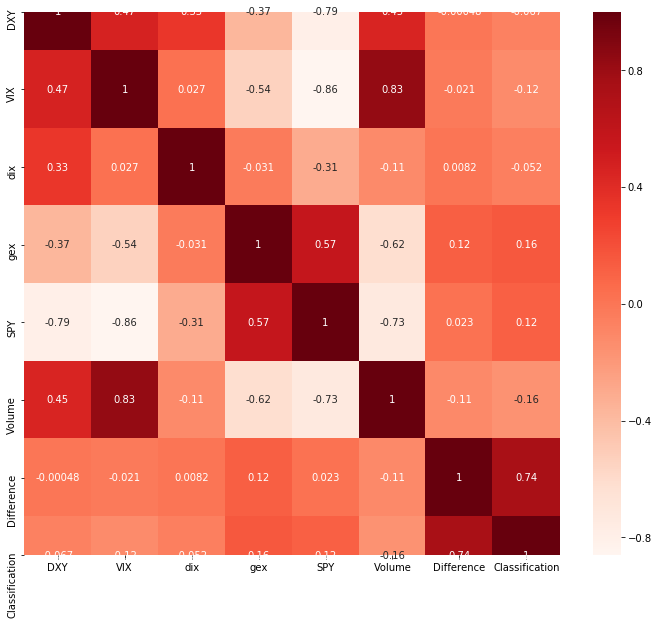

In [192]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(12,10))
cor = finalDf.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()